In [35]:
!pip freeze | grep scikit-learn

"grep" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [36]:
import sklearn

In [38]:
sklearn.__version__

'1.2.2'

In [1]:
import pickle
import pandas as pd

In [2]:
year = 2022
month = 2

input_file = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:02d}.parquet'
output_file = f'output/yellow_tripdata_{year:04d}-{month:02d}.parquet'

In [3]:
with open('model.bin', 'rb') as f_in:
    dv, lr = pickle.load(f_in)

In [4]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [5]:
#df = read_data('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2022-02.parquet')
#df = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet')

In [6]:
df = read_data(input_file)
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,ride_id
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,...,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25,12.433333,2022/02_0
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,...,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25,17.550000,2022/02_1
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,...,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25,23.650000,2022/02_2
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,...,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00,20.083333,2022/02_3
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,...,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25,26.316667,2022/02_4


In [9]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = lr.predict(X_val)

In [10]:
y_pred

array([18.52778307, 23.06578208, 33.68635854, ..., 11.89045938,
       15.10268128,  9.46059157])

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

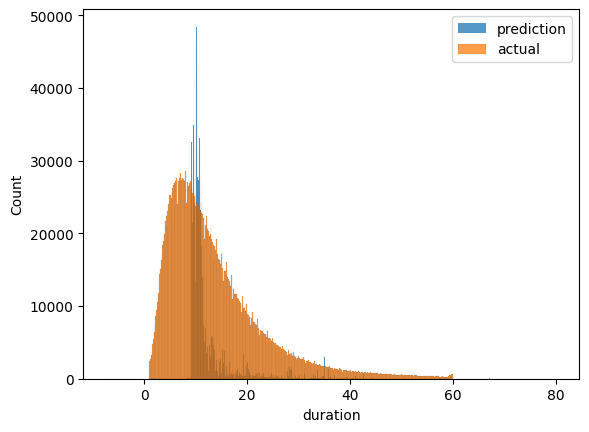

In [12]:
sns.histplot(y_pred, label='prediction')
sns.histplot(df.duration, label='actual')

plt.legend();

### Q1. Standard deviation

In [13]:
y_pred.mean()

12.513422116701408

In [14]:
y_pred.std()

5.28140357655334

### Q2. Preparing the output

In [15]:
df_result = pd.DataFrame()
df_result['ride_id'] = df['ride_id']
df_result['predicted_duration'] = y_pred

In [18]:
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [33]:
%ls output

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : C87E-7289

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\svizo\PycharmProjects\MLOps_Zoomcamp\homework4\homework\output

11.06.2023  13:14    <DIR>          .
11.06.2023  13:14    <DIR>          ..
11.06.2023  13:14        59я994я935 fhv_tripdata_2022-02.parquet
               1 д ©«®ў     59я994я935 Ў ©в
               2 Ї Ї®Є  243я189я530я624 Ў ©в бў®Ў®¤­®
